<a href="https://colab.research.google.com/github/JayanthRaju07/1CD22AI026/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

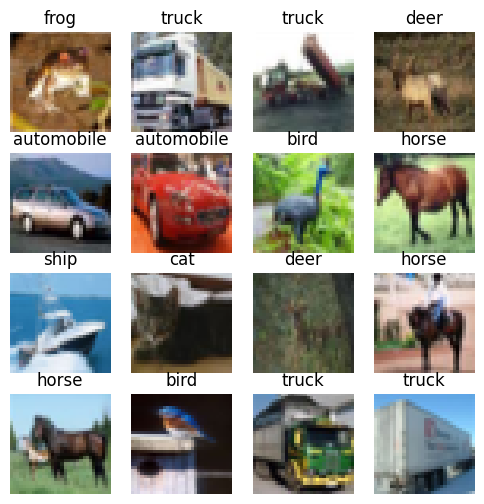

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 - 45s - 29ms/step - accuracy: 0.4094 - loss: 1.6272 - val_accuracy: 0.5478 - val_loss: 1.2861
Epoch 2/10
1563/1563 - 43s - 27ms/step - accuracy: 0.5748 - loss: 1.2164 - val_accuracy: 0.6043 - val_loss: 1.1229
Epoch 3/10
1563/1563 - 83s - 53ms/step - accuracy: 0.6355 - loss: 1.0541 - val_accuracy: 0.6315 - val_loss: 1.0609
Epoch 4/10
1563/1563 - 81s - 52ms/step - accuracy: 0.6677 - loss: 0.9654 - val_accuracy: 0.6852 - val_loss: 0.9262
Epoch 5/10
1563/1563 - 47s - 30ms/step - accuracy: 0.6876 - loss: 0.9210 - val_accuracy: 0.6796 - val_loss: 0.9652
Epoch 6/10
1563/1563 - 44s - 28ms/step - accuracy: 0.7020 - loss: 0.8967 - val_accuracy: 0.6969 - val_loss: 0.9682
Epoch 7/10
1563/1563 - 81s - 52ms/step - accuracy: 0.7052 - loss: 0.8937 - val_accuracy: 0.6919 - val_loss: 1.0043
313/313 - 3s - 10ms/step - accuracy: 0.6852 - loss: 0.9262

Test Accuracy: 0.6852


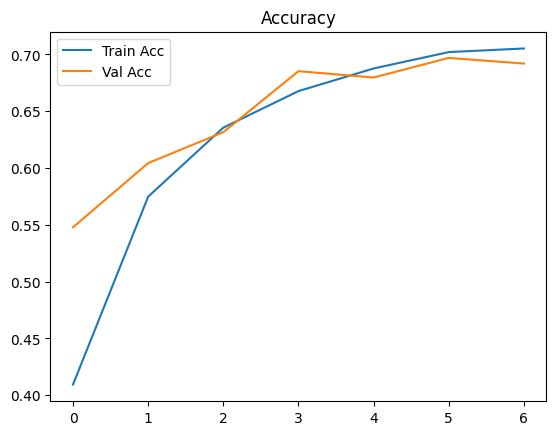

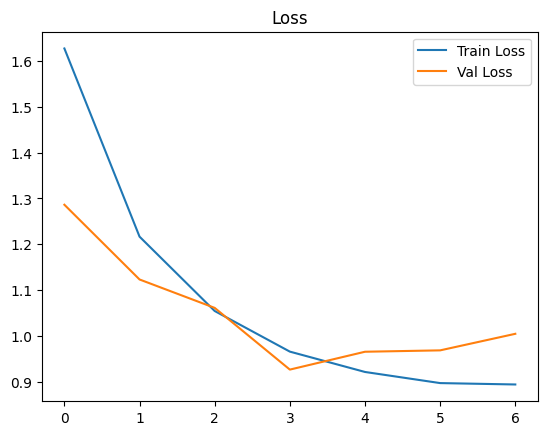

True: truck
Predicted: ship


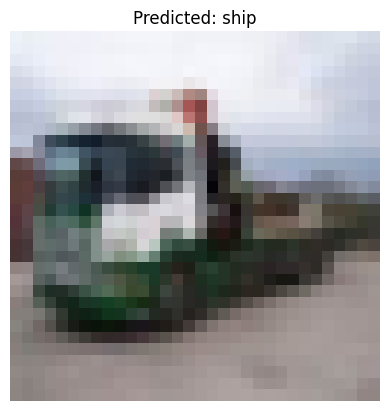

Model saved successfully


In [9]:
# ===============================
# CIFAR-10 CNN CLASSIFICATION
# ===============================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D,
    Flatten, Dense, Dropout
)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# LOAD DATASET
# -------------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

class_names = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]

# -------------------------------
# DISPLAY SAMPLE IMAGES
# -------------------------------
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

# -------------------------------
# MODEL
# -------------------------------
model = Sequential([
    Input(shape=(32,32,3)),

    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, activation='relu'),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.summary()

# -------------------------------
# COMPILE
# -------------------------------
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# TRAIN
# -------------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=2
)

# -------------------------------
# EVALUATE
# -------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# -------------------------------
# PLOTS
# -------------------------------
epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], label="Train Acc")
plt.plot(epochs, history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(epochs, history.history['loss'], label="Train Loss")
plt.plot(epochs, history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

# -------------------------------
# RANDOM TEST IMAGE PREDICTION
# -------------------------------
idx = random.randint(0, len(x_test)-1)
img = x_test[idx]
true_label = y_test[idx][0]

pred = model.predict(img[np.newaxis, ...], verbose=0)
predicted_label = np.argmax(pred)

print("True:", class_names[true_label])
print("Predicted:", class_names[predicted_label])

plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_label]}")
plt.axis("off")
plt.show()

# -------------------------------
# SAVE MODEL
# -------------------------------
model.save("cifar10_cnn.keras")
print("Model saved successfully")
